In [33]:
import matplotlib.pyplot as plt
import incense
from common.helper.config import parseMongoConfig
import pandas as pd
import numpy as np
loader = incense.ExperimentLoader(**parseMongoConfig('./config.ini', adapt='IncenseExperimentLoader'))

In [2]:
all_experiments = loader.find_by_name('CNN-IMU_Pamap2\(activity_labels\)')
len(all_experiments)

32

Training Time for one batch.


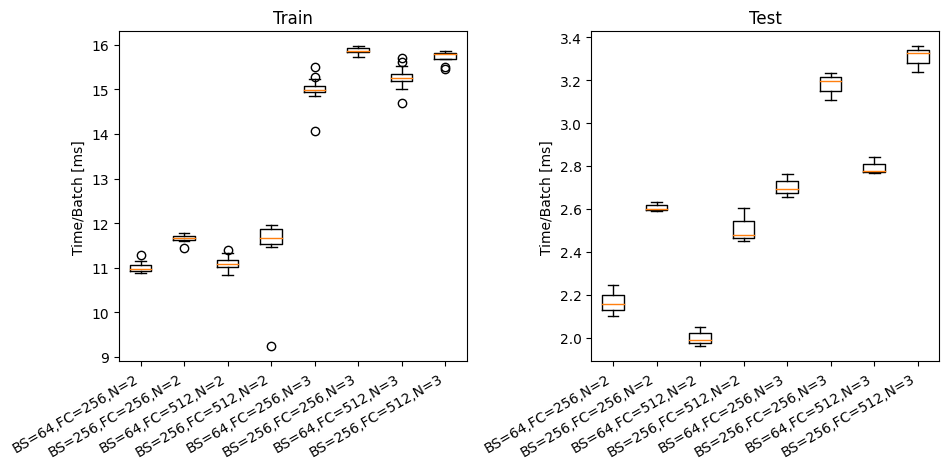

In [10]:
exp_sel1 = {(e.to_dict()['config']['batch_size'], e.to_dict()['config']['cnn_imu_fc_features'],
             e.to_dict()['config']['cnn_imu_blocks']): e for e in all_experiments}
fig, ax = plt.subplots(1, 2)
fig.set_figwidth(fig.get_figwidth() * 1.5)
ax[0].boxplot(x=[e.metrics['train/batch_time']*1e3 for e in exp_sel1.values()],
              labels=[f'BS={bs},FC={f},N={n}' for bs, f, n in exp_sel1.keys()])
ax[0].set_title('Train')
ax[0].set_ylabel('Time/Batch [ms]')
ax[1].boxplot(x=[e.metrics['test/batch_time']*1e3 for e in exp_sel1.values()],
              labels=[f'BS={bs},FC={f},N={n}' for bs, f, n in exp_sel1.keys()])
ax[1].set_ylabel('Time/Batch [ms]')
ax[1].set_title('Test')
fig.autofmt_xdate()
fig.tight_layout()
fig.show()


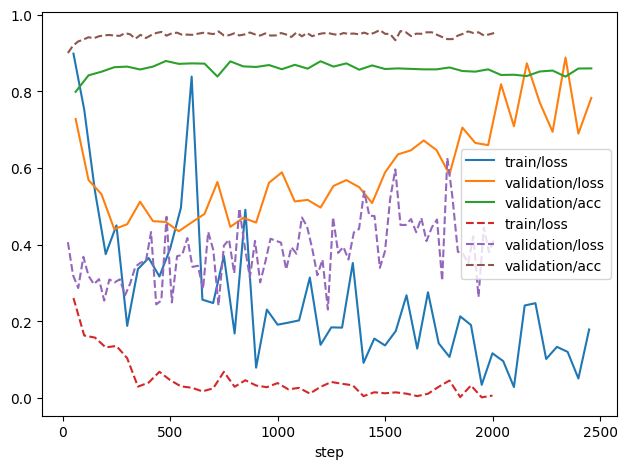

In [47]:
query_2 = {
    "$and" : [
    {"experiment.name": "CNN-IMU_Pamap2(activity_labels)"},
    {"config.use_transient_class": True},
    ]
}
exp_sel2 = loader.find(query_2)
query_3 = {
    "$and" : [
    {"experiment.name": "CNN-IMU_Pamap2(activity_labels)"},
    {"config.use_transient_class": False},
    ]
}
exp_sel3 = loader.find(query_3)

plt.figure()
exp_sel2_wf1 = max(exp_sel2, key=lambda e: e.metrics['test/wf1'].values.max())
exp_sel2_wf1.metrics['train/loss'].plot()
exp_sel2_wf1.metrics['validation/loss'].plot()
exp_sel2_wf1.metrics['validation/acc'].plot()
exp_sel3_wf1 = max(exp_sel3, key=lambda e: e.metrics['test/wf1'].values.max())
exp_sel3_wf1.metrics['train/loss'].plot(linestyle='dashed')
exp_sel3_wf1.metrics['validation/loss'].plot(linestyle='dashed')
exp_sel3_wf1.metrics['validation/acc'].plot(linestyle='dashed')
plt.tight_layout()
_ = plt.legend()

